# Reducing hospital readmissions

## 📖 Background
You work for a consulting company helping a hospital group better understand patient readmissions. The hospital gave you access to ten years of information on patients readmitted to the hospital after being discharged. The doctors want you to assess if initial diagnoses, number of procedures, or other variables could help them better understand the probability of readmission. 

They want to focus follow-up calls and attention on those patients with a higher probability of readmission.

## 💾 The data
You have access to ten years of patient information ([source](https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008)):

#### Information in the file
- "age" - age bracket of the patient
- "time_in_hospital" - days (from 1 to 14)
- "n_procedures" - number of procedures performed during the hospital stay
- "n_lab_procedures" - number of laboratory procedures performed during the hospital stay
- "n_medications" - number of medications administered during the hospital stay
- "n_outpatient" - number of outpatient visits in the year before a hospital stay
- "n_inpatient" - number of inpatient visits in the year before the hospital stay
- "n_emergency" - number of visits to the emergency room in the year before the hospital stay
- "medical_specialty" - the specialty of the admitting physician
- "diag_1" - primary diagnosis (Circulatory, Respiratory, Digestive, etc.)
- "diag_2" - secondary diagnosis
- "diag_3" - additional secondary diagnosis
- "glucose_test" - whether the glucose serum came out as high (> 200), normal, or not performed
- "A1Ctest" - whether the A1C level of the patient came out as high (> 7%), normal, or not performed
- "change" - whether there was a change in the diabetes medication ('yes' or 'no')
- "diabetes_med" - whether a diabetes medication was prescribed ('yes' or 'no')
- "readmitted" - if the patient was readmitted at the hospital ('yes' or 'no') 

***Acknowledgments**: Beata Strack, Jonathan P. DeShazo, Chris Gennings, Juan L. Olmo, Sebastian Ventura, Krzysztof J. Cios, and John N. Clore, "Impact of HbA1c Measurement on Hospital Readmission Rates: Analysis of 70,000 Clinical Database Patient Records," BioMed Research International, vol. 2014, Article ID 781670, 11 pages, 2014.*

## EXECUTIVE SUMMARY
The findings of the analysis reveal key insights into the most common primary diagnosis and readmission rates among patients. Circulatory issues are the top diagnosis across age groups, with the highest prevalence among those aged 60-80. The readmission rate for patients with diabetes is significantly higher compared to those without diabetes, and this group is the only one with a higher number of patients readmitted than those not readmitted. Diabetes diagnosis increases the rate of readmissions. The top three diagnosis with the highest probability of readmissions are Diabetes, Respiratory and Circulatory diagnosis. These findings can inform the doctors in developing targeted strategies to manage, reduce and prevent readmissions such as paying attention to these groups and follow-up calls. It is also important to understand why there is a large number of patients with circulatory diagnosis in order to better understand how this number can be reduced. 

## READING THE FILE 
Reading the csv file and assigning it to the variable readmissions.

In [85]:
suppressPackageStartupMessages(library(tidyverse))
readmissions <- readr::read_csv('data/hospital_readmissions.csv', show_col_types = FALSE)
readmissions

age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no
[40-50),2,51,0,10,0,0,0,Missing,Other,Other,Other,no,no,no,no,yes
[50-60),4,44,2,21,0,0,0,Missing,Injury,Other,Other,no,normal,yes,yes,no
[60-70),1,19,6,16,0,0,1,Other,Circulatory,Other,Other,no,no,no,yes,yes
[80-90),4,67,3,13,0,0,0,InternalMedicine,Digestive,Other,Other,no,no,no,no,yes


## Business problem
This report seeks to answer the following questions which would be useful in determining the patients with a higher probability of readmissions so that the doctors can pay more attention to and focus fol1ow-up calls on this group:

1. What is the most common primary diagnosis by age group? 
2. Some doctors believe diabetes might play a central role in readmission. Explore the effect of a diabetes diagnosis on readmission rates. 
3. On what groups of patients should the hospital focus their follow-up efforts to better monitor patients with a high probability of readmission?

## INSTALL PACKAGES AND LOAD LIBRARIES
Installing and loading the package dplyr which would be used for the analysis.

In [86]:
install.packages('dplyr')
library(dplyr)

Installing dplyr [1.1.0] ...
	OK [linked cache]


### INTRODUCTION
This project is an analysis on ten years of information on patients readmitted to a hospital after being discharged. It focuses on assessing if initial diagnoses, number of procedures, or other variables in the data could help the hospital doctors better understand the probability of readmissions. This is to assist the doctor's to focus follow-up calls and attention on those patients with a higher probability of readmission.

### METHODOLOGY
This analysis was done using R programming language. To determine the most common diagnosis by age group, R code is used to count and sort the data into age groups and primary diagnosis in descending order to determine the most common primary diagnosis by age group. Secondly, to determine the effect of diabetes on readmissions, the probability of readmission rates is calculated by counting the number of patients with diabetes and dividing by the count of patients with diabetes who were readmitted. This is also done for patients without diabetes and then compared to determine the effect of diabetes diagnosis on readmission rate. Finally, the percentage of readmissions of all diagnosis is analyzed to determine the patients with high probability of readmissions. 

## 1. Most Common primary diagnosis by age group
Below is the table that shows the most common diagnosis in the hospital by the age group of the patients. 

In [87]:
# most common primary diagnosis by age group

most_common <- readmissions %>% 
				select(age, diag_1) %>%
				group_by(age, diag_1) %>%
				count(age, diag_1, sort = TRUE)
				
				
most_common

New names:
• `` -> `...1`


age,diag_1,n
<chr>,<chr>,<int>
[70-80),Circulatory,2392
[60-70),Circulatory,1962
[70-80),Other,1693
[80-90),Circulatory,1482
[60-70),Other,1402
[80-90),Other,1269
[50-60),Circulatory,1256
[50-60),Other,1164
[70-80),Respiratory,964


From the table, it can be seen that patients aged 70-80 with circulatory diagnosis top the chart of the most common diagnosis. Next to this are those with circulatory diagnosis aged 60-70.

## 2. The effect of a diabetes diagnosis on readmission rates

To determine the effect of diabetes on the readmission rate, the data is analyzed by comparing the readmission rate of all patients, patients with diabetes and patients without diabetes separately.

First, the total number of patients in each group is counted:

A. Patients with diabetes

B. Patients without diabetes

C. All patients

In [88]:
# Patients with Diabetes

with_diabetes <- readmissions %>%
select(diag_1) %>% 
filter(diag_1 == "Diabetes") %>%
count()

with_diabetes

n
<int>
1747


In [89]:
# Patients without Diabetes

without_diabetes <- readmissions %>%
select(diag_1) %>%
filter(diag_1 != "Diabetes") %>%
count()

without_diabetes

n
<int>
23253


In [90]:
# All Patients 

all_patients <- readmissions %>%
select(diag_1) %>%
count()

all_patients

n
<int>
25000


The total population of patients is 25000, those with Diabetes 1747, while those without Diabetes is 23253. 
Next, the number of patients in each group who were readmitted is also counted:

C. Patients with diabetes who were readmitted

D. Patients without diabetes who were readmitted 

E. All patients who were readmitted

In [91]:
# Patients with Diabetes who were readmitted

readmitted_diabetes <- readmissions %>%
select(diag_1, readmitted) %>%
filter(diag_1 == "Diabetes" & readmitted == "yes") %>%
count()

readmitted_diabetes

n
<int>
937


In [92]:
# Patients without diabetes who were readmitted

readmitted_nodiabetes <- readmissions %>%
select(diag_1, readmitted) %>%
filter(diag_1 != "Diabetes" & readmitted == "yes") %>%
count()

readmitted_nodiabetes

n
<int>
10817


In [93]:
# All patients who were readmitted

all_readmissions <- readmissions %>%
select(diag_1, readmitted) %>%
filter(readmitted == "yes") %>%
count()

all_readmissions

n
<int>
11754


To determine the effect of diabetes on readmission rate, the readmission rate for each group is calculated as follows:

* Readmission rate for patients with diabetes(rate_diabetes): To determine the readmission rate of patients with diabetes, we divide the number of patients with diabetes diagnosis who were readmitted by the total number of diabetes diagnosis and then multiply by 100 to give us the percentage probability.

readmitted_diabetes/with_diabetes * 100 

* Readmission rate for patients without diabetes(rate_nodiabetes): Similarly, we divide the number of patients with no diabetes diagnosis who were readmitted by the total number of patients with no diabetes and then multiply by 100 to give us the percentage probability.

readmitted_nodiabetes/without_diabetes * 100 

* Readmission rate of all patients:

all_readmissions/all_patients * 100

In [94]:
# Readmission rate for patients with diabetes

rate_diabetes <- round(readmitted_diabetes/with_diabetes * 100, 2)
rate_diabetes

# Readmission rate for patients without diabetes
rate_nodiabetes <- round(readmitted_nodiabetes/without_diabetes * 100, 2)
rate_nodiabetes

# Readmission rate of all patients

readmission_rate <- round(all_readmissions/all_patients * 100, 2)
readmission_rate

# Creating a data frame to visualize this

df <- data.frame(rate = c("rate_diabetes", "rate_nodiabetes", "readmission_rate"),
                 values = c(53.63, 46.52, 47.02))

df

n
<dbl>
53.63


n
<dbl>
46.52


n
<dbl>
47.02


rate,values
<chr>,<dbl>
rate_diabetes,53.63
rate_nodiabetes,46.52
readmission_rate,47.02


rate,values
<chr>,<dbl>
rate_diabetes,53.63
rate_nodiabetes,46.52
readmission_rate,47.02


From this analysis, the readmission rate of all the patients in the hospital is 47%. Patients with primary diabetes diagnosis have a readmission rate of 53.63%,  patients without primary diabetes diagnosis 46.52%. This shows that the rate of readmissions increases from 46.52% to 47% when patients having a primary diabetes diagnosis are considered.

To further explore the patients with primary diabetes diagnosis, Visualizing the probability of readmissions is helpful.

In [96]:
# probability of patients with primary diabetes diagnosis

diab_rate <- readmissions %>%
					filter(diag_1 == "Diabetes") %>%
					select(readmitted) %>%
					group_by(readmitted) %>%
					summarise(count = n()) %>%
					mutate(ratio = round((count/sum(count) * 100), 1))

diab_rate

readmitted,count,ratio
<chr>,<int>,<dbl>
no,810,46.4
yes,937,53.6


readmitted,count,ratio
<chr>,<int>,<dbl>
no,810,46.4
yes,937,53.6


From the primary diagnosis, the rate of readmissions(54%) of patients with diabetes diagnosis is higher than when there are no readmissions(46%). This is why the patients with a daiabetes diagnosis lead to an increase in readmission rates.

Furthermore, it is important to visualize the distribution all diagnosis of readmitted patients

In [98]:
# counting all diagnosis and readmissions

all_diagnosis <- readmissions %>%
select(diag_1, readmitted) %>%
group_by(diag_1, readmitted) %>%
count(readmitted)

all_diagnosis

New names:
• `` -> `...1`


diag_1,readmitted,n
<chr>,<chr>,<int>
Circulatory,no,4074
Circulatory,yes,3750
Diabetes,no,810
Diabetes,yes,937
Digestive,no,1224
Digestive,yes,1105
Injury,no,939
Injury,yes,727
Missing,no,2


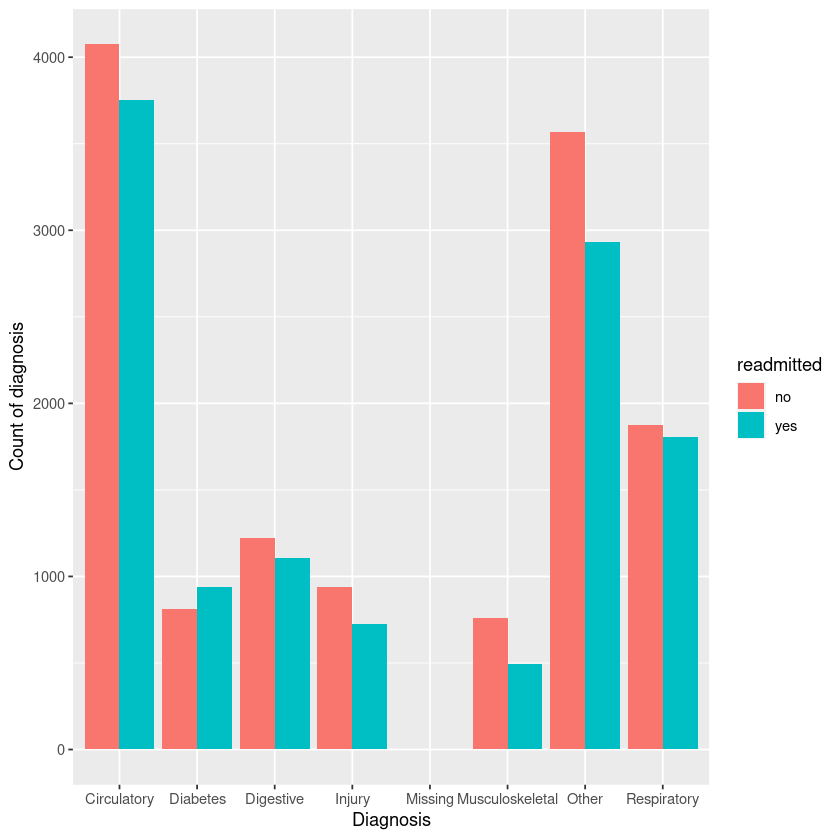

In [99]:
# Visualizing readmissions of all diagnosis

all_diagnosis_plot <- ggplot(all_diagnosis, aes(diag_1, n, fill = readmitted)) + geom_bar(position = "dodge", stat = "identity") + labs(x = "Diagnosis", y = "Count of diagnosis")

all_diagnosis_plot

The graph above shows that Diabetes diagnosis is the only diagnosis which has the number of readmitted patients exceeding those who were not readmitted.

## 3. GROUPS OF PATIENTS WITH A HIGHER PROBABILITY OF READMISSIONS

To calculate the patients with high probability of readmissions, the probability of readmissions of each group of diagnosis is calculated. To do this, the total number of readmitted patients for each diagnosis is divided by the total number of patients in that category and multiplied by hundred. I created a table to calculate the total number of patients grouped by their diagnosis and then joined this to another table of the total number of patients readmitted in each diagnosis group.

In [100]:
# creating a table of total number of patients in each diagnosis

total_diag <- readmissions %>%
group_by(diag_1) %>%
summarise(n_diag = n())

# creating a table of total number of readmitted patients in each diagnosis

total_readmitted <- readmissions %>%
group_by(diag_1, readmitted) %>%
filter(readmitted == "yes") %>%
summarise(n_readmitted = n())

# Joining both tables and then calculating the probability of each group

high_prob <- inner_join(total_diag, total_readmitted, by = c("diag_1")) %>%
mutate(probability = n_readmitted/n_diag * 100) %>%
arrange(desc(probability))

high_prob

`summarise()` has grouped output by 'diag_1'. You can override using the
`.groups` argument.


diag_1,n_diag,readmitted,n_readmitted,probability
<chr>,<int>,<chr>,<int>,<dbl>
Diabetes,1747,yes,937,53.63480
Missing,4,yes,2,50.00000
Respiratory,3680,yes,1806,49.07609
Circulatory,7824,yes,3750,47.92945
Digestive,2329,yes,1105,47.44526
Other,6498,yes,2932,45.12158
Injury,1666,yes,727,43.63745
Musculoskeletal,1252,yes,495,39.53674


diag_1,n_diag,readmitted,n_readmitted,probability
<chr>,<int>,<chr>,<int>,<dbl>
Diabetes,1747,yes,937,53.63480
Missing,4,yes,2,50.00000
Respiratory,3680,yes,1806,49.07609
Circulatory,7824,yes,3750,47.92945
Digestive,2329,yes,1105,47.44526
Other,6498,yes,2932,45.12158
Injury,1666,yes,727,43.63745
Musculoskeletal,1252,yes,495,39.53674


The table and graph above shows that the top three Diagnosis with high probability of readmissions include Diabetes(53.6%), Respiratory(49%) and Circulatory(47.9%).

NB: Missing diagnosis is eliminated from the list as this suggests missing data and also has a very small sample size.

### FINDINGS

1. The top three most common primary diagnosis by age groups are:
circulatory, age 70-80
circulatory, age 60-70
Other, age 70-80

2. The readmission rate of patients with diabetes diagnosis is 54% as against those without diabetes which is 46%. The readmission rate increases to 47% when patients with diabetes are included.

3. Patients with Diabetes diagnosis are the only group that have more number of patients readmitted than those not readmitted, when the number of readmissions of each group are compared against number of patients without readmissions.

4. The top three diagnosis with high probability of readmissions are Diabetes, Respiratory and Circulatory diagnosis respectively.


### RECOMMENDATIONS

1. Further analysis may be required to find out why there is a high number of patients with circulatory diagnosis in the hospital. Although this may be due to the age of the patients, it is important to ascertain the accuracy of this presumption so that measures can be taken in order to pay closer attention to this in the future. 
2. Patients with diabetes play a major role on readmission rate as they have the highest probability of readmissions and they are the only group that have more number of patients readmitted than those not readmitted. More attention should be placed on this group in order to discover why the readmission rate is higher.
3. It would be helpful for hospital doctors to also dig deeper into the prevelant diagnosis which are under the umbrella of Other diagnosis. This is due to the fact that other diagnosis also has a high number of cases in the hospital over the past years. 

### CONCLUSION

In conclusion, the recommendations suggest that doctors need to pay more attention to certain groups of patients in order to decrease readmission rates. These groups include patients with the most common primary diagnosis by age group(circulatory, age 60-80) and patients who have a high probability of readmissions especially the patients with a Diabetes diagnosis. By digging deeper into these groups, doctors can uncover the reasons behind the high readmission rates and develop effective strategies to prevent readmissions.